### Spice anomaly

Estimate the spice anomalies as defined in recent obs studies : Scherbina et al 2009, Klymak et al 2015, Jaeger et al 2019. 

These studies define spice relative to a local reference T-S profile. 

Defined as :
\begin{equation}
\tau = \alpha dT + \beta dS,
\end{equation}
where $dT$ and $dS$ are relative to some reference. In these studies this reference is chosen as some smoothed mean T-S value from the data.

In [2]:
import numpy as np
import xarray as xr 

import matplotlib.pylab as plt
from matplotlib.colors import BoundaryNorm
import glidertools as gt

from cmocean import cm as cmo

import gsw

In [3]:
plt.style.use('seaborn-colorblind')
plt.rcParams['font.size'] = 12

In [70]:
data_dir = '/Users/dhruvbalwada/OneDrive/sogos_data'
data_659 = data_dir+'/data/interim/gliders/sg659_20201010/CTD_659.nc'
data_660 = data_dir+'/data/interim/gliders/sg660_20201010/CTD_660.nc'

ds_659 = xr.load_dataset(data_659)
ds_660 = xr.load_dataset(data_660)

In [71]:
ds_659['potdens'] = gt.physics.potential_density(ds_659.salinity, 
                                                 ds_659.temperature, 
                                                 ds_659.pressure, 
                                                 ds_659.latitude, 
                                                 ds_659.longitude)

ds_660['potdens'] = gt.physics.potential_density(ds_660.salinity, 
                                                 ds_660.temperature, 
                                                 ds_660.pressure,
                                                 ds_660.latitude, 
                                                 ds_660.longitude)

In [72]:
ds_659

<xarray.Dataset>
Dimensions:      (ctd_data_point: 1363330)
Dimensions without coordinates: ctd_data_point
Data variables:
    pressure     (ctd_data_point) float64 nan nan nan nan ... 1.165 1.037 nan
    latitude     (ctd_data_point) float64 -51.51 -51.51 -51.51 ... -51.7 -51.7
    longitude    (ctd_data_point) float64 30.03 30.03 30.03 ... 38.99 38.99
    temperature  (ctd_data_point) float64 3.564 3.561 3.56 ... 1.812 1.811 1.814
    salinity     (ctd_data_point) float64 nan nan nan nan ... 33.89 33.89 nan
    dives        (ctd_data_point) float64 1.0 1.0 1.0 1.0 ... 462.5 462.5 462.5
    time         (ctd_data_point) datetime64[ns] 2019-04-30T13:20:51.23000345...
    potdens      (ctd_data_point) float64 nan nan nan ... 1.027e+03 nan

(0.0, 10.0)

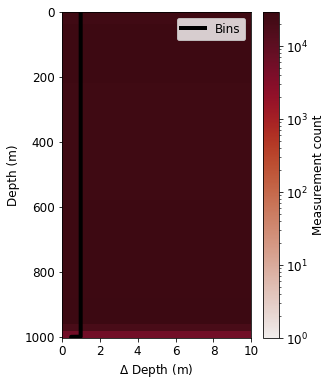

In [73]:
ax = gt.plot.bin_size(ds_659.pressure, cmap=cmo.amp)
plt.xlim([0,10])

In [74]:
ds_659_grid_z = xr.Dataset()
ds_659_grid_z['temperature'] = gt.grid_data(ds_659.dives, ds_659.pressure, 
                             ds_659.temperature, bins = np.arange(10,950,4))
ds_659_grid_z['salinity'] = gt.grid_data(ds_659.dives, ds_659.pressure, 
                             ds_659.salinity, bins = np.arange(10,950,4))

Mean bin size = 4.00
Mean depth binned (50 m) vertical sampling frequency = 0.63
Mean bin size = 4.00
Mean depth binned (50 m) vertical sampling frequency = 0.63


In [75]:
ds_659_grid_z['potdens'] = gt.grid_data(ds_659.dives, ds_659.pressure, 
                             ds_659.potdens, bins = np.arange(10,950,4))


Mean bin size = 4.00
Mean depth binned (50 m) vertical sampling frequency = 0.63


In [76]:
ds_660_grid_z = xr.Dataset()
ds_660_grid_z['temperature'] = gt.grid_data(ds_660.dives, ds_660.pressure, 
                             ds_660.temperature, bins = np.arange(10,950,4))
ds_660_grid_z['salinity'] = gt.grid_data(ds_660.dives, ds_660.pressure, 
                             ds_660.salinity, bins = np.arange(10,950,4))

Mean bin size = 4.00
Mean depth binned (50 m) vertical sampling frequency = 0.69
Mean bin size = 4.00
Mean depth binned (50 m) vertical sampling frequency = 0.69


In [77]:
potdens = gt.grid_data(ds_660.dives, ds_660.pressure, 
                             ds_660.potdens, bins = np.arange(10,950,10))

Mean bin size = 10.00
Mean depth binned (50 m) vertical sampling frequency = 0.69


In [63]:
ds_660_grid_z['potdens']

<xarray.DataArray 'potdens' (pressure: 234, dives: 1007)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * pressure  (pressure) float64 12.0 16.0 20.0 24.0 ... 932.0 936.0 940.0 944.0
  * dives     (dives) float64 1.0 1.5 2.0 2.5 3.0 ... 506.0 506.5 507.0 507.5
Attributes:
    units:          kg/m3
    standard_name:  potential_density
    history:        [2021-04-22 21:28:02] (v2021.3) glidertools.physics.poten...

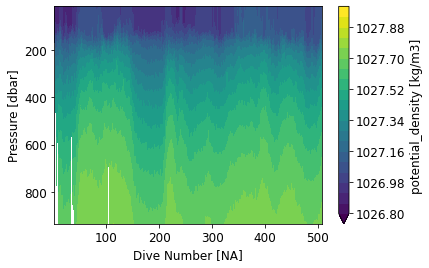

In [65]:
potdens.plot.contourf(levels = np.linspace(1026.8, 1028,21) )
plt.gca().invert_yaxis()

(array([0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        6.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 1.000e+01, 1.000e+01,
        1.200e+01, 1.000e+01, 9.000e+00, 2.400e+01, 2.800e+01, 3.700e+01,
        8.700e+01, 5.520e+02, 4.710e+02, 8.400e+02, 1.372e+03, 1.982e+03,
        2.654e+03, 3.108e+03, 3.452e+03, 3.583e+03, 3.622e+03, 3.408e+03,
        3.214e+03, 3.010e+03, 2.797e+03, 2.518e+03, 2.312e+03, 2.150e+03,
        1.910e+03, 1.783e+03, 1.559e+03, 1.446e+03, 1.308e+03, 1.122e+03,
        1.026e+03, 9.120e+02, 8.440e+02, 7.250e+02, 6.370e+02, 6.070e+02,
        4.820e+02, 4.130e+02, 3.820e+02, 3.430e+02, 2.650e+02, 2.660e+02,
        1.710e+02, 1.760e+02, 1.480e+02, 1.200e+02, 1.010e+02, 9.700e+01,
        6.200e+01, 6.500e+01, 6.000e+01, 4.000e+01, 4.700e+01, 3.200e+01,
        2.900e+01, 2.700e+01, 3.000e+01, 1.600e+01, 2.300e+01, 2.100e+01,
        7.000e+00, 7.000e+00, 1.100e+0

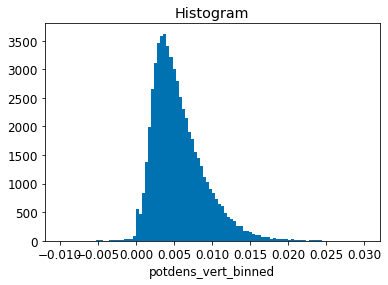

In [69]:
potdens.diff('pressure').sel(pressure = slice(300, 900)).plot.hist(bins = np.linspace(-0.01, 0.03,101))

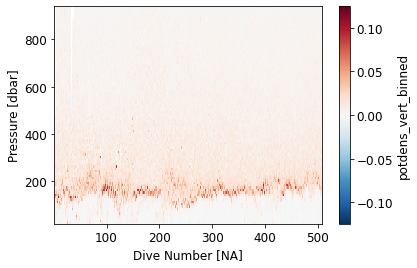

In [68]:
potdens.diff('pressure').plot()

In [13]:
CTgrid = np.linspace(0.5,4, 50)
SAgrid = np.linspace(33.6, 34.8, 51)

[CTg, SAg] = np.meshgrid(CTgrid, SAgrid)

Potdens = gsw.sigma0(SAg, CTg)

(33.6, 34.8)

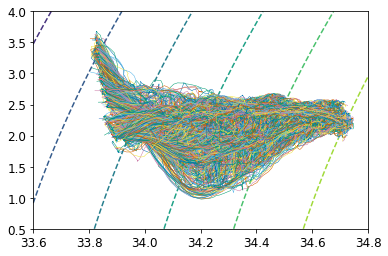

In [38]:
plt.contour(SAg, CTg, Potdens, linestyles='--')
plt.plot(ds_659_grid_z.salinity, ds_659_grid_z.temperature, linewidth = 0.5)
plt.xlim([33.6, 34.8])

(33.6, 34.8)

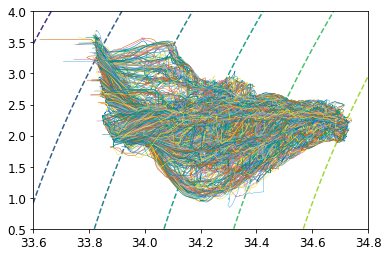

In [40]:
plt.contour(SAg, CTg, Potdens, linestyles='--')
plt.plot(ds_660_grid_z.salinity, ds_660_grid_z.temperature, linewidth = 0.5)
plt.xlim([33.6, 34.8])

In [ ]:
ds_659_grid_z['potdens'] = gt.physics.potential_density(ds_659_grid_z)